# Super Data Science Club Reto Mensual - 1

## Para este primer reto tenemos el dataset del Departamento de Transporte de USA (DoT) donde debemos analizar y tratar de reducir el numero de cancelacion de vuelos y mejorar la experiencia de los viajantes. El reto es ayudar el DoT predecir si un vuelo sera cancelado o no con la data suministrada.

# Exploracion de la data.

### Importando las primeras librerias para iniciar.

In [1]:
import numpy as np
import pandas as pd

### Importanto la data y un primer vistazo.

In [2]:
data = pd.read_csv('E:\Python\Machine Learning\SDS Club Challenges\September Challenge\Data\public_flights.csv')
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


### Verificando los valores nulos o faltantes.

In [3]:
data.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER            5981
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            2
DISTANCE                  0
SCHEDULED_ARRIVAL         0
CANCELLED                 0
dtype: int64

In [4]:
data.isnull().sum() / len(data)

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.007130
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
SCHEDULED_TIME         0.000002
DISTANCE               0.000000
SCHEDULED_ARRIVAL      0.000000
CANCELLED              0.000000
dtype: float64

### Como los registros con valores faltantes son muy pocos, eliminarlos no nos afecta mucho (aunque esta opcion nunca debe ser la primera).

In [5]:
dataset = data.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832875 entries, 0 to 838857
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 832875 non-null  int64  
 1   MONTH                832875 non-null  int64  
 2   DAY                  832875 non-null  int64  
 3   DAY_OF_WEEK          832875 non-null  int64  
 4   AIRLINE              832875 non-null  object 
 5   FLIGHT_NUMBER        832875 non-null  int64  
 6   TAIL_NUMBER          832875 non-null  object 
 7   ORIGIN_AIRPORT       832875 non-null  object 
 8   DESTINATION_AIRPORT  832875 non-null  object 
 9   SCHEDULED_DEPARTURE  832875 non-null  int64  
 10  SCHEDULED_TIME       832875 non-null  float64
 11  DISTANCE             832875 non-null  int64  
 12  SCHEDULED_ARRIVAL    832875 non-null  int64  
 13  CANCELLED            832875 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 95.3+ MB


### Como es un problema de clasificacion verificamos nuestra variable dependiente o target, y podemos ver que tenemos un severo caso de clases desbalanceadas donde tenemos mas registros de una clase que de otra, y esto afectaria bastante a nuestro modelo, dando como resultado un modelo que solo sabe predecir que un vuelo sera cancelado.

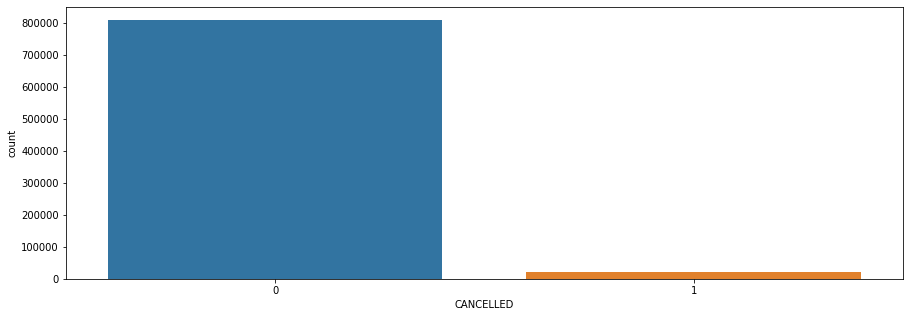

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5))
sns.countplot(dataset['CANCELLED'])

### Algunos de los metodos para poder lidiar con este tipo de problematicas, las cuales son muy comunes cuando se esta trabajando con problemas de clasificacion, son los siguientes:

 - Upsampling.
 - Downsampling.
 - Distintas metricas de evaluacion del modelo.
 
### Upsampling: Consiste en duplicar los registros de la clase con menor ocurrencia para igualar a la de mayor ocurrencia, el problema con este metodo es que tiende a causar que el modelo se ajuste demasiado, haciendo que en vez de aprender, memorice los datos, a esto se le llama Overfitting.

### Downsampling: Consiste en tomar de forma aleatoria la misma cantidad de registros que tiene la clase de menor ocurrencia, de los registros de la clase con mayor ocurrencia, el problema con este es que perdemos data lo cual puede causar que nuestro modelo aprenda menos por la poca cantidad de registros, a esto se le conoce como Underfitting.

### Distintas metricas: Este metodo consiste en no evaluar nuestro modelo con solamente una metrica, por ejemplo, exactitud de las predicciones (Accuracy), si no, utilizar otras metodos como; Matriz de Confuncion, Precision, Recall y F1 Score. 

### Primero usare el metodo de downsampling, esto para poder realizar un EDA(Exploratory Data Analysis) con una data mas balanceada y tratar de entender un poco mas la data que tengo antes de proceder con la creacion del modelo.

In [7]:
from sklearn.utils import resample

#Primero hacemos la division de la data en cancelados y no cancelados
cancelados = dataset[dataset['CANCELLED'] == 1]
no_cancelados = dataset[dataset['CANCELLED'] == 0]

print(f'Cantidad de registros de vuelos cancelados: {len(cancelados)}')
print(f'Cantidad de registros de vuelos no cancelados: {len(no_cancelados)}')

Cantidad de registros de vuelos cancelados: 22699
Cantidad de registros de vuelos no cancelados: 810176


In [8]:
#Luego realizamos la seleccion aleatoria de la data creando un nuevo dataframe con los registros aleatorios
#Y por ultimo lo unimos como un solo dataset con los registros que pertenecen a los cancelados
data_downsampled = resample(no_cancelados, replace = False, n_samples = len(cancelados))
dataset_downsampled = pd.concat([data_downsampled, cancelados])

### Ahora nuestro nuevo dataset esta mas balanceado.

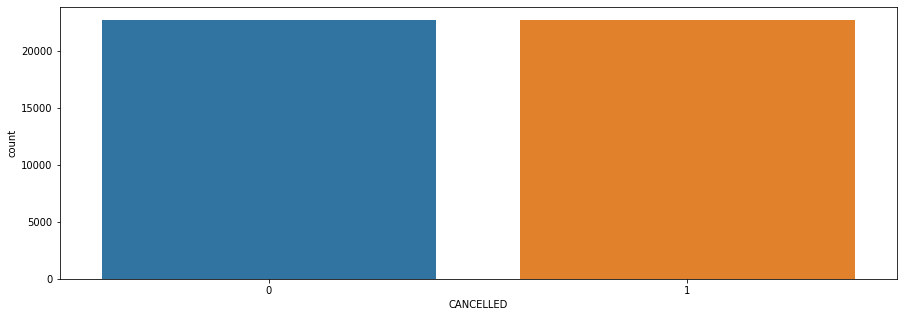

In [9]:
plt.figure(figsize = (15, 5))
sns.countplot(dataset_downsampled['CANCELLED'])

# Analisis Exploratorio de la Data (EDA)

## Antes de crear nuestro modelo uno de los pasos previos mas importantes es realizar un Analisis Exploratorio de la Data o EDA del ingles Exploratory Data Analysis, que consiste en realizar un analisis de la data que se tiene, con el fin de poder encontrar hallazgos que nos ayuden con la creacion del modelo para mejorar su rendimiento y tambien brindarnos informaciones que tambien puedan ayudar a tomar mejores decisiones para una mejor experiencia al usuario.

## La mejor forma para realizar este EDA es a traves de una visualizacion de la data o mejor dicho, graficando la data de forma que dichas visualizaciones nos den una mejor idea de como esta relacionada la data y tambien entenderla mejor.

### Podemos iniciar con ver que relacion existe entre los dias del mes y nuestro target.

### Se puede observar que los dias 1 y 2 son los dias de mas cancelaciones de los vuelos, mientras que esto disminuye luego de los dias 24 a excepcion de los dias 26 y 27.

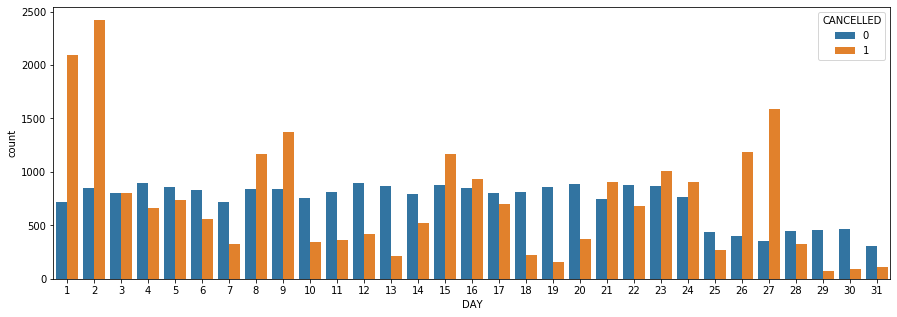

In [10]:
plt.figure(figsize = (15, 5))
sns.countplot('DAY', hue = 'CANCELLED', data = dataset_downsampled)

### Este ultimo nos dice que febrero es el mes con la mayor cantidad de vuelos cancelados, pero cabe destacar que la data solo cuenta con dos meses, Enero y Febrero.

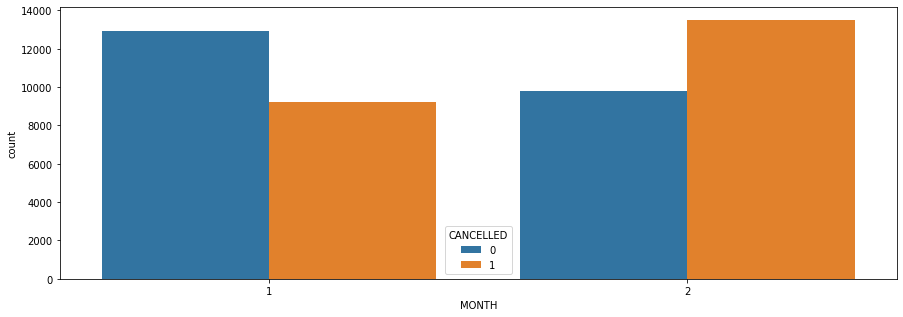

In [11]:
plt.figure(figsize = (15, 5))
sns.countplot('MONTH', hue = 'CANCELLED', data = dataset_downsampled)

### Al parecer los Lunes son los dias de mayor cancelacion de los vuelos.

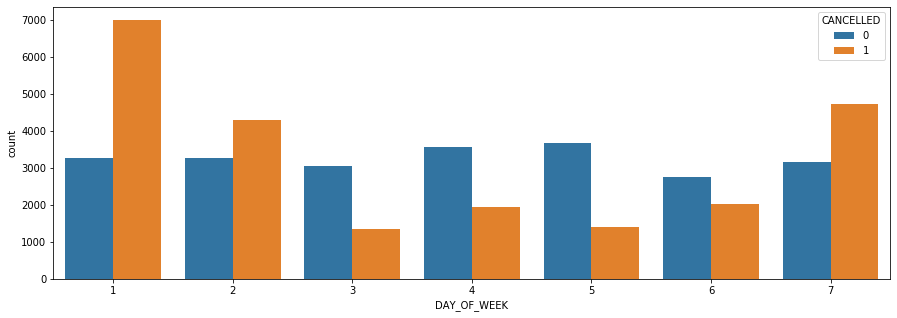

In [12]:
plt.figure(figsize = (15, 5))
sns.countplot('DAY_OF_WEEK', hue = 'CANCELLED', data = dataset_downsampled)

### Retornando al primer grafico donde los dias 1 y 2 eran los de mayor cancelacion de vuelos queria ver si encontrabamos un porque.

In [13]:
# Primero creando un dataframe solo con registros que tenga como valor el dia 1 o 2
dias = dataset_downsampled[(dataset_downsampled['DAY'] == 1) | (dataset_downsampled['DAY'] == 2)]

### Primero verificando el mes, seguimos viendo que febrero es el mes de mas cancelacion de vuelos.

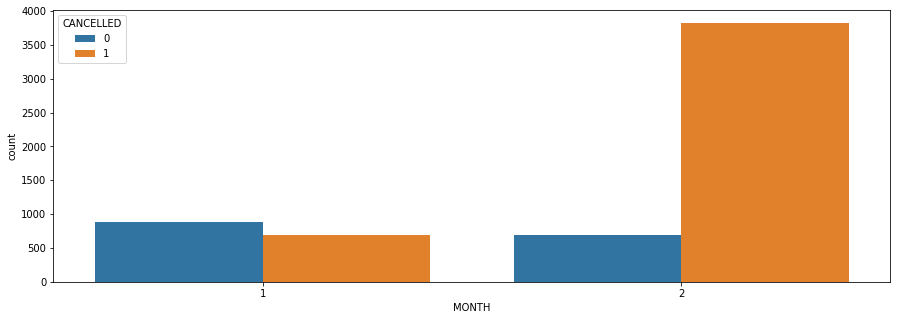

In [14]:
plt.figure(figsize = (15, 5))
sns.countplot('MONTH', hue = 'CANCELLED', data = dias)

### Y que estos dias corresponden, en su gran mayoria, a los dias Lunes y Domingo.

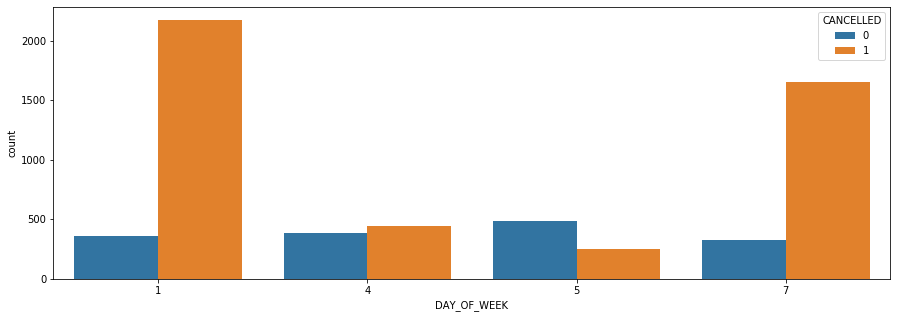

In [15]:
plt.figure(figsize = (15, 5))
sns.countplot('DAY_OF_WEEK', hue = 'CANCELLED', data = dias)

### Ahora viendo los dias 26 y 27 que tambien mostraban gran cantidad de cancelaciones.

### En estos dias solo corresponden al mes de Enero.

In [16]:
dias_ = dataset_downsampled[(dataset_downsampled['DAY'] == 26) | (dataset_downsampled['DAY'] == 27)]

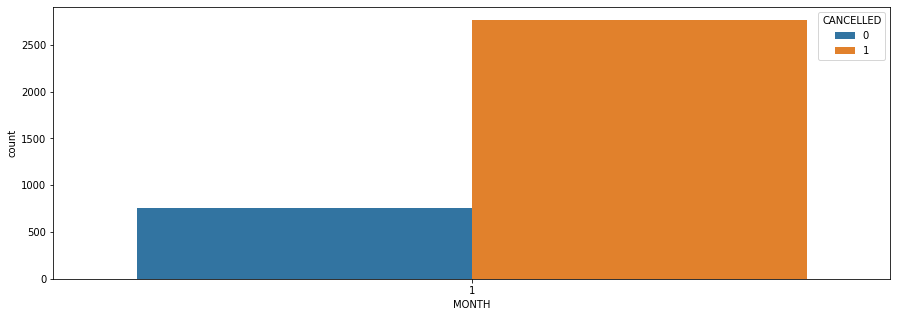

In [17]:
plt.figure(figsize = (15, 5))
sns.countplot('MONTH', hue = 'CANCELLED', data = dias_)

### Para los dias de la semana, solo se tienen Lunes y Martes.

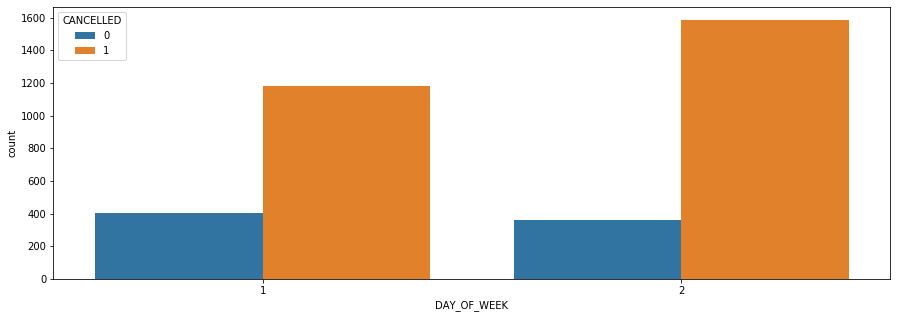

In [18]:
plt.figure(figsize = (15, 5))
sns.countplot('DAY_OF_WEEK', hue = 'CANCELLED', data = dias_)

### Ahora vamos a ver que relacion tienen los vuelos respecto a la distancia, pero si graficamos esa informacion vemos que tenemos demasiados valores y por esto se hace dificil realizar un analisis.

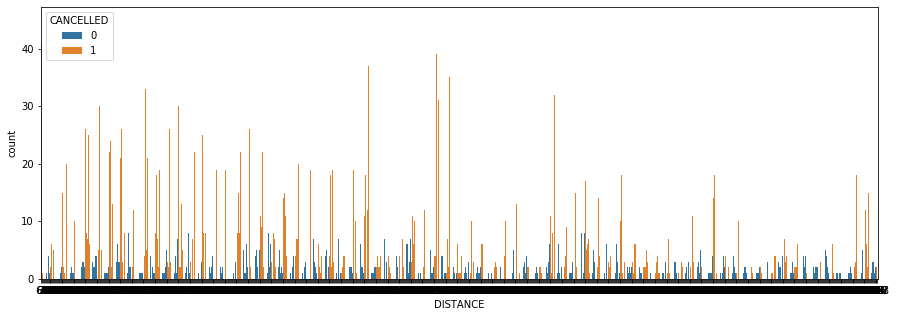

In [19]:
plt.figure(figsize = (15, 5))
sns.countplot('DISTANCE', hue = 'CANCELLED', data = dias)

### Una solucion a esto puede ser agrupar los valores de la distancia en rangos.

In [20]:
#Primero creamos los rangos que necesitamos
bins = np.array([range(100, 5000, 100)]).flatten()

#Creamos una variable nueva que tenga como valor el indice del rango a que pertenece ese registro
distance_bins = np.digitize(dataset_downsampled['DISTANCE'].values, bins = bins)

#Insertamos esos valores como una nueva columna en nuestro dataset
dataset_downsampled.insert(12, 'DISTANCE_BIN', distance_bins)

### Y ahora si podemos hacer un mejor analisis de esto, el cual nos indica que los vuelos menores a 1,000 millas tienen mas probabilidad de ser cancelados.

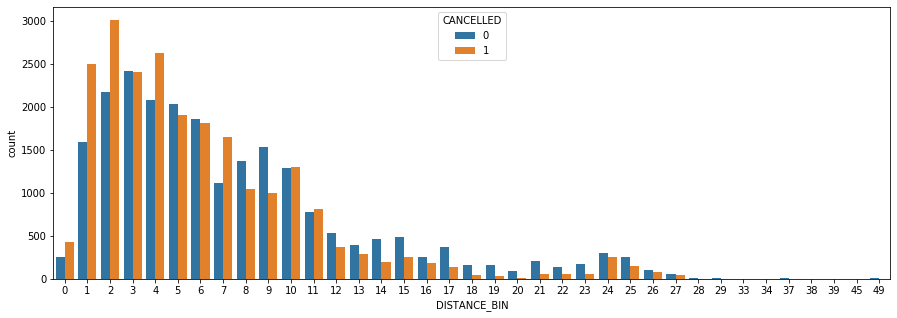

In [21]:
plt.figure(figsize = (15, 5))
sns.countplot('DISTANCE_BIN', hue = 'CANCELLED', data = dataset_downsampled)

### Para hacer un analisis similar pero con el tiempo estipulado de la duracion del vuelo debemos hacer el mismo ejercicio de crear rangos ya que igual que la distancia, la cantidad de registros no permite hacer un buen analisis.

In [22]:
#Creamos nuestros rangos, decidi hacer los rangos en horas, es decir 60 minutos.
bins = np.array([range(60, 750, 60)]).flatten()

#Creamos nuestra variable con los indices
distance_bins = np.digitize(dataset_downsampled['SCHEDULED_TIME'].values, bins = bins)

#Y finalmente insertamos en nuestro dataset
dataset_downsampled.insert(11, 'SCHEDULED_TIME_BIN', distance_bins)

### Con el tiempo me sorprende ver que los vuelos de menor duracion son los de mas cantidad de cancelacion, especialmente los vuelos que duran mas de una 1 hora pero menos de 2.

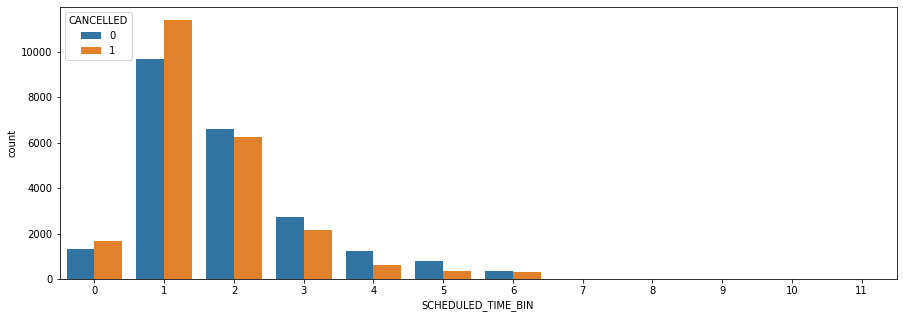

In [23]:
plt.figure(figsize = (15, 5))
sns.countplot('SCHEDULED_TIME_BIN', hue = 'CANCELLED', data = dataset_downsampled)

## Creo que esto tenemos una buena base de analisis de nuestro dataset, este analisis podria ser de utilidad para tomar algunas decisiones que puedan mejorar la experiencia de los usuarios para reducir las cancelaciones de los vuelos, dentro de los hallazgos encontrados tenemos:
 - Los dias que presentan un mayor numero de vuelos cancelados son los dias 1, 2, 26 y 27.
 - Febrero es el mes de mayor cancelaciones.
 - Los dias Lunes y Domingo son los de mayor cancelacion.
 - Tambien que a mayor la distancia del vuelo menos es la probabilidad de ser sea cancelado.
 - La duracion del vuelo influye de igual forma en su cancelacion.
 
## Pero estos atributos o features son muy pocos para llegar una conclucion mas detallada,  ya que sin contaramos con mas features como: el costo del vuelo, razon de cancelacion, tiempo de anticipacion de la cancelacion y entre otras mas que podrian ayudar a realizar un mejor analisis.

# Ingenieria de Atributos (Feature Engineering)

## El siguiente paso es tratar de tener los mejores features o los de mayor importancia que ayuden al modelo, dentro de esto existen varias tecnicas como crear nuevos features de ya existentes y\o seleccionar solamente los features que se consideren relevantes.

## En cierto modo para una de las anteriores visualizaciones realizamos un poco de feature engineering cuando creamos los rangos para la distancia y el tiempo de los vuelos, pero podemos crear al menos uno mas, que podria ser el tiempo del dia de los vuelos, es decir, AM o PM.

In [24]:
#Primero creamos nuestro array de los valores de las columnas correspondientes
#Dando como condicion que si es mayor o igual a 1200, 12:00, sea PM, de los contrario AM
departure = np.where(dataset_downsampled['SCHEDULED_DEPARTURE'] >= 1200, 'PM', 'AM')
arrival = np.where(dataset_downsampled['SCHEDULED_DEPARTURE'] >= 1200, 'PM', 'AM')

In [25]:
#Y luego agreamos esta informacion como columnas nuevas a nuestro dataset
dataset_downsampled.insert(10, 'TIME_OF_DAY_DEPARTURE', departure)
dataset_downsampled.insert(13, 'TIME_OF_DAY_ARRIVAL', arrival)
dataset_downsampled.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,TIME_OF_DAY_DEPARTURE,SCHEDULED_TIME,SCHEDULED_TIME_BIN,TIME_OF_DAY_ARRIVAL,DISTANCE,DISTANCE_BIN,SCHEDULED_ARRIVAL,CANCELLED
579482,2015,2,8,7,WN,260,N604SW,CMH,BWI,1140,AM,70.0,1,AM,337,3,1250,0
232743,2015,1,16,5,UA,1567,N14230,OMA,DEN,630,AM,106.0,1,AM,472,4,716,0
36707,2015,1,3,6,AA,1554,N3GCAA,DFW,SNA,1135,AM,195.0,3,AM,1205,12,1250,0
761943,2015,2,20,5,AA,2424,N5DHAA,LAX,DFW,700,AM,178.0,2,AM,1235,12,1158,0
420232,2015,1,28,3,UA,446,N846UA,ORD,MCI,1534,PM,96.0,1,PM,403,4,1710,0


### Antes de terminar hacemos un pequeño renombramiento de las columnas para una mejor identificacion.

In [26]:
names = {'DAY_OF_WEEK': 'WEEK', 'SCHEDULED_DEPARTURE': 'DEPARTURE', 'TIME_OF_DAY_DEPARTURE': 'DEPARTURE_DAY',
         'SCHEDULED_TIME': 'TIME', 'SCHEDULED_TIME_BIN': 'TIME_BIN', 'TIME_OF_DAY_ARRIVAL': 'ARRIVAL_DAY',
         'SCHEDULED_ARRIVAL': 'ARRIVAL'}

dataset_downsampled.rename(names, axis = 1, inplace = True)

### Por ultimo eliminamos las columnas que consideramos innecesarias para el modelo, es decir que no aportan informacion para que nuestro modelo pueda entrenar de la mejor manera, pero en esta primera parte de entrenamiento lo haremos con todas las variables disponibles y luego determinar cuales son de menos importancia.

In [36]:
dataset_train = dataset_downsampled.drop(['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
                                         axis = 1)
dataset_train.head()

,YEAR,MONTH,DAY,WEEK,FLIGHT_NUMBER,DEPARTURE,DEPARTURE_DAY,TIME,TIME_BIN,ARRIVAL_DAY,DISTANCE,DISTANCE_BIN,ARRIVAL,CANCELLED
579482,2015,2,8,7,260,1140,AM,70.0,1,AM,337,3,1250,0
232743,2015,1,16,5,1567,630,AM,106.0,1,AM,472,4,716,0
36707,2015,1,3,6,1554,1135,AM,195.0,3,AM,1205,12,1250,0
761943,2015,2,20,5,2424,700,AM,178.0,2,AM,1235,12,1158,0
420232,2015,1,28,3,446,1534,PM,96.0,1,PM,403,4,1710,0


# Preprocesamiento de la Data (Data Preprocessing)

## El siguiente paso es convertir nuestros atributos a valores que nuestro modelo pueda entender y que permita un entrenamiento mas rapido y eficiente, es decir, procesar la data.

### Podemos iniciar con convertir nuestros atributos categoricos, aunque solo tenemos uno, a valores numericos. De nuestros atributos el unico que es categorico es el TIME_OF_DAY ya que sus valores son "AM" o "PM". Esto lo podemos hacer de forma muy sencilla con pandas y el metodo get_dummies().

In [37]:
dataset_train = pd.get_dummies(dataset_train, columns = ['DEPARTURE_DAY', 'ARRIVAL_DAY'], drop_first = True)
dataset_train.head()

,YEAR,MONTH,DAY,WEEK,FLIGHT_NUMBER,DEPARTURE,TIME,TIME_BIN,DISTANCE,DISTANCE_BIN,ARRIVAL,CANCELLED,DEPARTURE_DAY_PM,ARRIVAL_DAY_PM
579482,2015,2,8,7,260,1140,70.0,1,337,3,1250,0,0,0
232743,2015,1,16,5,1567,630,106.0,1,472,4,716,0,0,0
36707,2015,1,3,6,1554,1135,195.0,3,1205,12,1250,0,0,0
761943,2015,2,20,5,2424,700,178.0,2,1235,12,1158,0,0,0
420232,2015,1,28,3,446,1534,96.0,1,403,4,1710,0,1,1


### Por ultimo tenemos el paso de escalar de los valores (feature scaling) donde todos nuestros valores numeros lo convertimos a una misma escala, con la finalidad de que esto eficientice el entrenamiento. Aunque cabe destacar que hay algoritmos que no es necesario realizar esta escala, como son los algoritmos a base de arboles de decisiones, pero aun asi esto puede ayudar con el tiempo de entrenamiento del modelo.

### Pero antes de esto primero realizaremos un paso muy importante que es la division de la data en, data de entrenamiento y data de prueba.

In [38]:
from sklearn.model_selection import train_test_split

X = dataset_train.drop(['CANCELLED'], axis = 1)
y = dataset_train['CANCELLED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento de modelo.

## Ya estamos listos para inicar con la creacion y entrenamiento de nuestro modelo, decidi iniciar rapidamente con un Random Forest (Bosque Aleatorio) ya que es uno de los algoritmos mas eficientes actualmente, aunque en Machine Learning se tiene el decir, No Free Lunch, que quiere decir que un solo algoritmo es el mejor para una tarea especifica, por lo que es bueno siempre realizar pruebas con distintos algoritmos.

### Como el Random Forest cuentra con muchos parametros que se pueden cambiar para tener los valores mas optimos primero realizaremos una busque de dichos valores optimos para algunos de los parametros de nuestro modelo, y esto lo logramos con RandomSearchCV.

In [42]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Creamos nuestra instancia de la clase RandomForest y creamos un diccionario de parametros
forest = RandomForestClassifier(n_jobs = -1)
parametros = {'n_estimators':[10, 50, 100, 150, 200, 250],
              'criterion':['gini', 'entropy'],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split':[2, 3, 4, 5 ,6, 7, 8, 9, 10]}


In [44]:
#Y por ultimo hacemos otra instancia a la clase de nuestro buscador de parametros e iniciamos la busqueda
grid_search = RandomizedSearchCV(forest, parametros, cv = 20, n_iter = 1000, n_jobs = -1, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 20 folds for each of 1000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 86.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250]},
                   verbose=3)

In [45]:
#Mejor combinacion de parametros
grid_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'criterion': 'entropy'}

In [46]:
#Mejor score con la combinacion de parametros
grid_search.best_score_

0.7888645313770464

### Ahora que tenemos la mejor combinacion posible de parametros y logrando con ella una precision de 78%, procedemos a crear nuestro modelo y entrenarlo con dichos parametros para verificar que la metrica se mantenga igual

In [48]:
forest = RandomForestClassifier(n_estimators = 150, min_samples_split = 7, min_samples_leaf = 1, max_depth = 15,
                                criterion = 'entropy')

#Utilizamos el metodo cross validation para tener un promedio de 20 diferentes modelos en sets diferentes.
scores = cross_val_score(forest, X_train, y_train, cv = 20, n_jobs = -1, verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   25.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   34.0s finished


In [49]:
#Y presentamos el promedio de la metrica de los entrenamientos.
print(np.mean(scores))

0.7868820918435455


### Confirmamos que la metrica se mantiene igual asi que procedemos a crear nuestro modelo con los parametros encontrados.

In [50]:
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=7,
                       n_estimators=150)

### Ahora que tenemos un modelo entrenado veamos que tal es haciendo predicciones en data nunca vista.

In [60]:
y_pred = forest.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print('Matriz de confucion\n', confusion_matrix(y_test, y_pred))
print('\nReporte de clasificacion\n',classification_report(y_test, y_pred))

Matriz de confucion
 [[3506 1034]
 [ 885 3655]]

Reporte de clasificacion
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      4540
           1       0.78      0.81      0.79      4540

    accuracy                           0.79      9080
   macro avg       0.79      0.79      0.79      9080
weighted avg       0.79      0.79      0.79      9080



### Efectivamente nuestro modelo tiene una precision de un 79%, en la matriz de confucion vemos que de 9,080 casos, 7, 161 fueron clasificados correctamente y en nuestro reporte tenemos un F1 Score de un 79%, es decir que tenemos un buen balance entre Precision y Recall.

### Pero en esta primera parte utilizamos todas las variables disponibles, vamos ahora a validar si realmente todas las variables son necesarias para nuestro modelo y tambien ver cuales variables son las de mas impacto para la prediccion, esto lo logramos gracias a uno de los atributos de nuestro modelo.

In [61]:
#Primero tomamos las variables de importancia y creamos un Series con ellas para presentarlas.
feature_importance = pd.Series(forest.feature_importances_, index = dataset_train.drop(['CANCELLED'], axis = 1).columns)
feature_importance = feature_importance.sort_values()

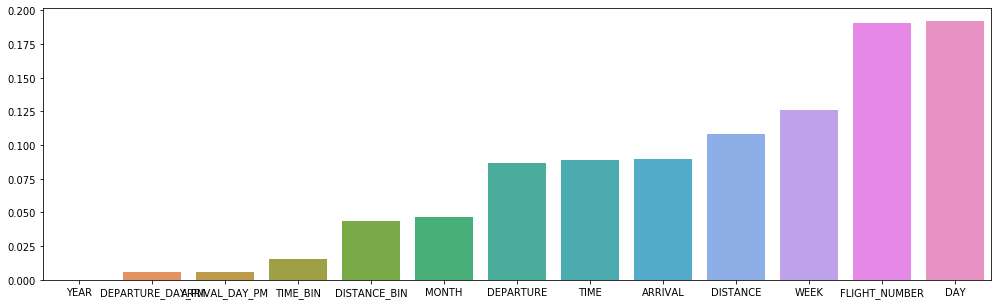

In [63]:
plt.figure(figsize = (17, 5))
sns.barplot(feature_importance.index, feature_importance.values)

### Para nuestro modelo la variable de mayor importancia es el dia, y con esto podemos decir que realizamos un buen analisis aunque fuese sencillo donde igual vimos que los dias tenian cierto nivel de relacion con nuestro target, pero tambien tenemos que el numero de vuelo es igual de importante (quizas con mas informacion se pudiese determinar porque seria esto). Con esta informacion intentemos realizar una segunda busqueda de parametros y entrenamiento del modelo con solo las variables de importancia para el modelo.

In [64]:
dataset_train = dataset_downsampled.drop(['YEAR', 'AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                                          'DEPARTURE_DAY', 'ARRIVAL_DAY'],
                                         axis = 1)

dataset_train.head()

,MONTH,DAY,WEEK,FLIGHT_NUMBER,DEPARTURE,TIME,TIME_BIN,DISTANCE,DISTANCE_BIN,ARRIVAL,CANCELLED
579482,2,8,7,260,1140,70.0,1,337,3,1250,0
232743,1,16,5,1567,630,106.0,1,472,4,716,0
36707,1,3,6,1554,1135,195.0,3,1205,12,1250,0
761943,2,20,5,2424,700,178.0,2,1235,12,1158,0
420232,1,28,3,446,1534,96.0,1,403,4,1710,0


In [65]:
#Realizamos otra division de la data para asegurar que tenemos los datos nuevos en el formato correcto
X = dataset_train.drop(['CANCELLED'], axis = 1)
y = dataset_train['CANCELLED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [66]:
#Escalamos la data nueva vez
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#Nuestra instancia del modelo y los paramtros a buscar
forest = RandomForestClassifier(n_jobs = -1)
parametros = {'n_estimators':[10, 50, 100, 150, 200],
              'criterion':['gini', 'entropy'],
              'max_depth':[1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split':[2, 3, 4, 5 ,6, 7, 8, 9, 10]}

In [68]:
#Y realizamos la segunda busqueda de parametros con la nueva combinacion de variables
grid_search = RandomizedSearchCV(forest, parametros, scoring = 'f1', n_iter = 2000, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 75.6min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 87.3min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 100.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks      

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring='f1', verbose=1)

In [69]:
#Mejor combinacion de parametros
grid_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'gini'}

In [70]:
#Mejor score con la combinacion de parametros
grid_search.best_score_

0.7936506805948909

### Utilizando solamente las variables que nuestro anterior modelo categorizo como de importancia aumentamos nuestra precision en 1%, vamos a validar que esa misma precision se mantenga en los entrenamientos del modelo con los parametros encontrados.

In [71]:
forest = RandomForestClassifier(n_estimators = 150, min_samples_split = 3, min_samples_leaf = 2, max_depth = 15,
                                criterion = 'gini')

#Utilizamos el metodo cross validation para tener un promedio de 20 diferentes modelos en sets diferentes.
scores = cross_val_score(forest, X_train, y_train, cv = 20, n_jobs = -1, verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   23.0s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.7s finished


In [72]:
#Presentamos el promedio de la metrica.
print(np.mean(scores))

0.789085281125229


### Al parecer tendremos la misma precision que el anterior modelo.

In [73]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=150)

In [74]:
y_pred = forest.predict(X_test)

print('Matriz de confucion\n', confusion_matrix(y_test, y_pred))
print('\nReporte de clasificacion\n',classification_report(y_test, y_pred))

Matriz de confucion
 [[3547  993]
 [ 848 3692]]

Reporte de clasificacion
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      4540
           1       0.79      0.81      0.80      4540

    accuracy                           0.80      9080
   macro avg       0.80      0.80      0.80      9080
weighted avg       0.80      0.80      0.80      9080



### Y aumentamos nuestra precision a un 80%, nada mal! Validemos que los parametros realmente son los de mayor importancia para el modelo.

In [75]:
#Primero tomamos las variables de importancia y creamos un Series con ellas para presentarlas.
feature_importance = pd.Series(forest.feature_importances_, index = dataset_train.drop(['CANCELLED'], axis = 1).columns)
feature_importance = feature_importance.sort_values()

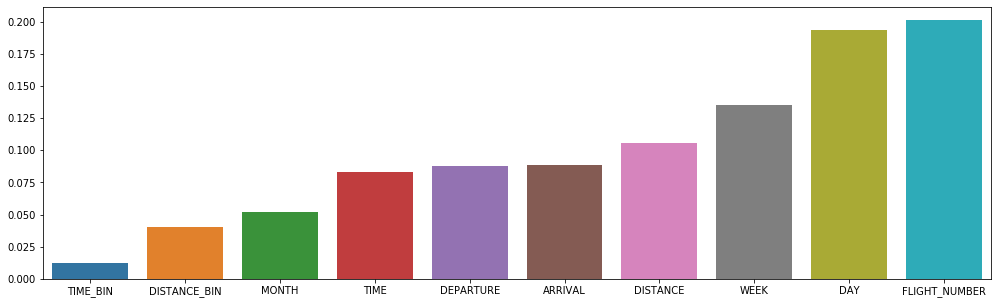

In [76]:
plt.figure(figsize = (17, 5))
sns.barplot(feature_importance.index, feature_importance.values)

## Efectivamente las variables mantuvierion su nivel de importancia para el modelo, esta es una de las razones por las cuales elegi RandomForest, ya que nos permite tener una mejor idea de cuales atributos son los que mas aportan para una prediccion precisa, y tambien porque esto hace de este algorimo una especie de "caja blanca" donde podemos hacer un analisis del porque esas variables fueron las de mayor importancia y con esto tomar las decisiones adecuadas para la mejora de los servicios.